In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline
plt.rcParams['figure.dpi']=70
plt.rcParams['savefig.dpi']=300

In [3]:
import seaborn as sns
#settings
sns.set_style('whitegrid')
sns.set(rc={"figure.dpi":70, "savefig.dpi":300})
sns.set_context("notebook")

In [4]:
data0 = pd.read_csv("DATA.csv")

In [5]:
Paper_Auth_Num = data0['entity_id'].value_counts().rename_axis('entity_id').reset_index(name='Paper_Auth_Num')
Paper_Auth_Num.head()

,entity_id,Paper_Auth_Num
0,5889370,4114
1,6392330,832
2,245130620,453
3,33187090,370
4,94870250,256


In [6]:
data = pd.merge(data0,Paper_Auth_Num,how="left")

In [7]:
data['Cite_per_P'] = data.citationCount_A / data.paperCount_A

In [8]:
#data.isnull().sum()

In [9]:
print(data.shape)
data.head()

(412393, 30)


,entity_id,entity_type,appearsInJournal,rank_P,referenceCount_P,appearsInConferenceInstance,citationCount_P,entity_idF,fos_list,dcterms_creator,...,rank_C,paperCount_C,citationCount_CS,entity_id_CS,rank_J,paperCount_J,citationCount_J,entity_id_J,Paper_Auth_Num,Cite_per_P
0,6320,NaN,NaN,24657,1,NaN,0,2778716859,Medicine,2.700171e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,17.600000
1,6320,NaN,NaN,24657,1,NaN,0,29456083,Medicine,2.700171e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,17.600000
2,6320,NaN,NaN,24657,1,NaN,0,71924100,Medicine,2.700171e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,17.600000
3,139580,NaN,NaN,24050,5,NaN,0,3017626604,Medicine,1.852443e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,17.737805
4,139580,NaN,NaN,24050,5,NaN,0,2779134260,Medicine,1.852443e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,17.737805


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412393 entries, 0 to 412392
Data columns (total 30 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   entity_id                    412393 non-null  int64  
 1   entity_type                  210627 non-null  object 
 2   appearsInJournal             157662 non-null  float64
 3   rank_P                       412393 non-null  int64  
 4   referenceCount_P             412393 non-null  int64  
 5   appearsInConferenceInstance  4647 non-null    float64
 6   citationCount_P              412393 non-null  int64  
 7   entity_idF                   412393 non-null  int64  
 8   fos_list                     412393 non-null  object 
 9   dcterms_creator              412393 non-null  float64
 10  entity_id_A                  412393 non-null  float64
 11  rank_A                       412393 non-null  float64
 12  paperCount_A                 412393 non-null  float64
 13 

In [11]:
data_corr = data[data.columns[[0,3,4,6,8,9,11,12,13,17,18,19,20,21,22,23,24,25,26,27,28,29]]]
#data_corr.corr()

<AxesSubplot:>

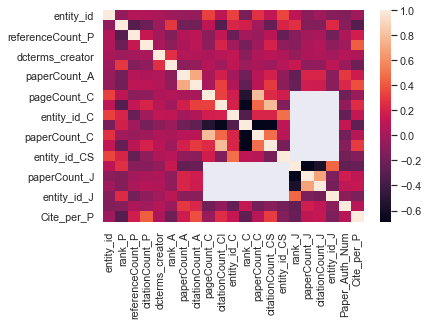

In [12]:
sns.heatmap(data_corr.corr())
#plt.title("Correlations Heatmap")

# Find JOURNAL Stats

In [13]:
journal0 = data[data.columns[[0,2,3,4,6,8,9,11,24,25,26,28,29]]]
journal = journal0.dropna()
journal["CPP_J"] = journal.citationCount_J / journal.paperCount_J
print(journal.shape)
journal.head()

(157662, 14)


<ipython-input-13-534235e6d1bf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  journal["CPP_J"] = journal.citationCount_J / journal.paperCount_J


,entity_id,appearsInJournal,rank_P,referenceCount_P,citationCount_P,fos_list,dcterms_creator,rank_A,rank_J,paperCount_J,citationCount_J,Paper_Auth_Num,Cite_per_P,CPP_J
11,186380,2.501223e+09,23892,0,3,Medicine,2.095945e+09,19655.0,10274.0,6928.0,21655.0,121,2.333333,3.125722
12,186380,2.501223e+09,23892,0,3,Medicine,2.137510e+09,19655.0,10274.0,6928.0,21655.0,121,2.333333,3.125722
13,186380,2.501223e+09,23892,0,3,Medicine,2.142913e+09,18821.0,10274.0,6928.0,21655.0,121,1.250000,3.125722
14,186380,2.501223e+09,23892,0,3,Medicine,2.169296e+09,19074.0,10274.0,6928.0,21655.0,121,1.666667,3.125722
15,186380,2.501223e+09,23892,0,3,Medicine,2.201193e+09,19655.0,10274.0,6928.0,21655.0,121,2.333333,3.125722


In [14]:
journal['rank_P'] = journal.groupby('entity_id')['rank_P'].ffill()
journal1 = journal.drop_duplicates('entity_id', keep='first')

print(journal1.shape)
journal1.head()

(18506, 14)


<ipython-input-14-209086959e47>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  journal['rank_P'] = journal.groupby('entity_id')['rank_P'].ffill()


,entity_id,appearsInJournal,rank_P,referenceCount_P,citationCount_P,fos_list,dcterms_creator,rank_A,rank_J,paperCount_J,citationCount_J,Paper_Auth_Num,Cite_per_P,CPP_J
11,186380,2.501223e+09,23892,0,3,Medicine,2.095945e+09,19655.0,10274.0,6928.0,21655.0,121,2.333333,3.125722
110,211120,1.412939e+08,22745,0,4,Medicine,1.991453e+09,16120.0,10106.0,3408.0,43889.0,33,12.640625,12.878228
159,273070,2.021754e+08,25329,0,0,Medicine,2.248273e+09,21075.0,11245.0,1379.0,9976.0,4,0.000000,7.234228
165,388540,4.379012e+07,22404,98,1,Medicine,2.704138e+09,19612.0,8163.0,37681.0,372177.0,11,26.625000,9.877047
173,390320,7.151271e+07,20799,0,26,Medicine,1.993843e+09,16858.0,9596.0,6498.0,59882.0,80,34.176471,9.215451


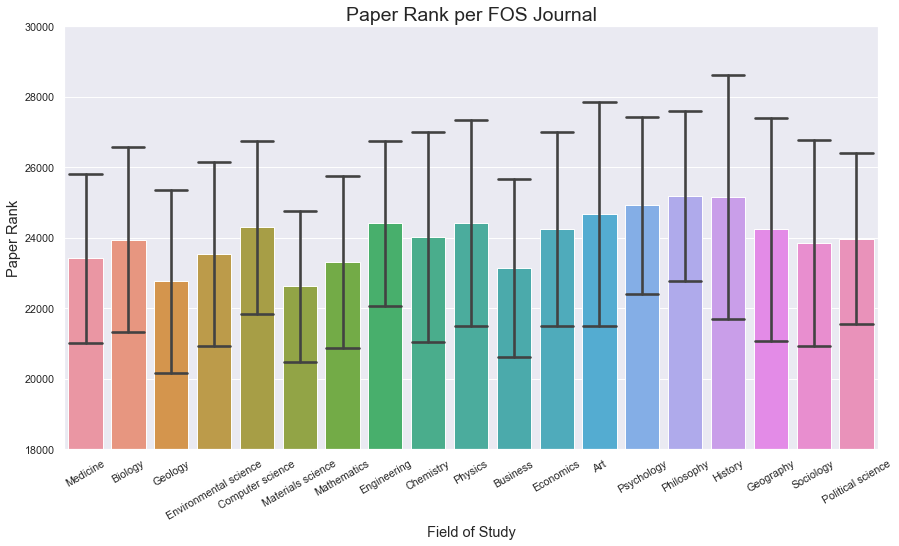

In [15]:
#print(journal1.groupby("fos_list").agg({'rank_P': ['count','mean', 'min', 'max','std']}))
#journal1['fos_list'].value_counts()
fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(15, 8)
ax = sns.barplot(x = "fos_list", y = "rank_P",data = journal1, capsize=0.75,ci = "sd");
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30);
ax.set(ylim=(18000, 30000))
#ax.set(ylim=(15000, 23000))

plt.title("Paper Rank per FOS Journal", fontsize = 20);
plt.xlabel("Field of Study", fontsize = 15);
plt.ylabel("Paper Rank", fontsize = 15);

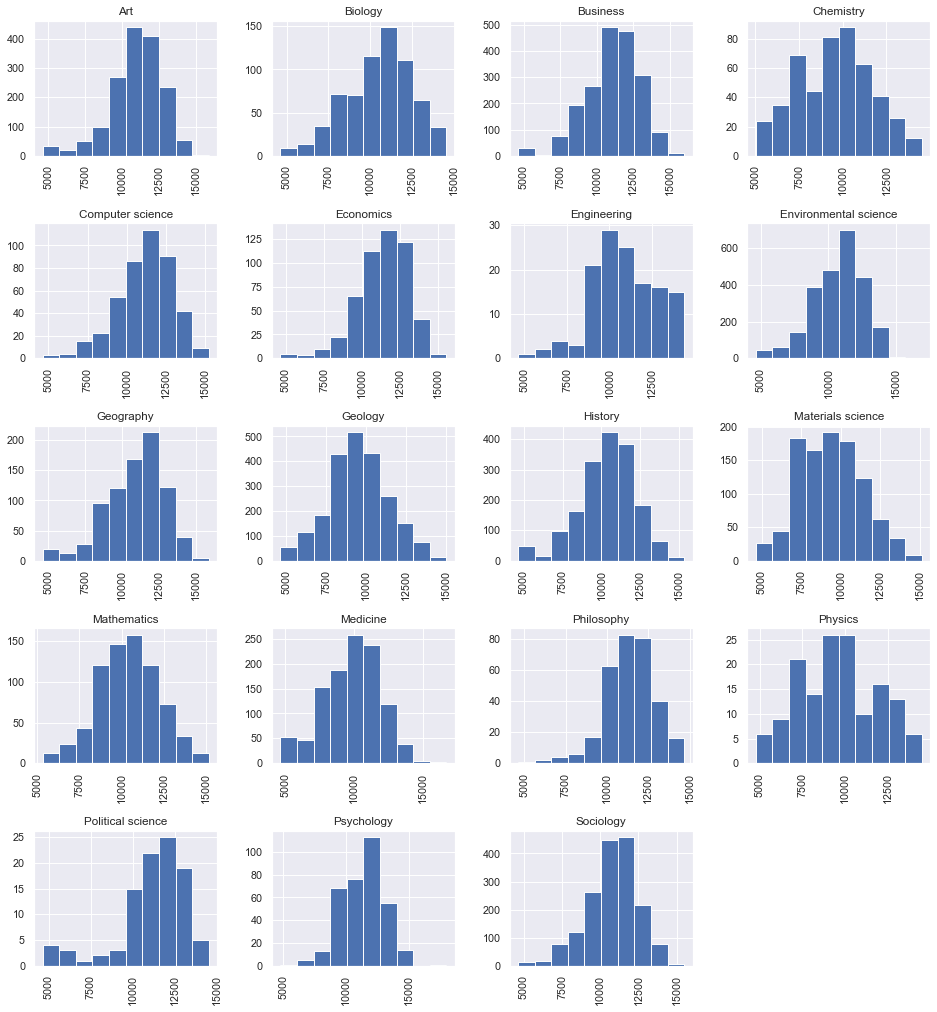

In [16]:
journal1['rank_J'].hist(by=journal1['fos_list'], figsize = (16,18));
#journal1.groupby("fos_list").boxplot(column="rank_P", figsize=(16,18));



JOURNAL RANK
rank_P              0.156792
referenceCount_P   -0.101267
citationCount_P    -0.126997
rank_A              0.148493
rank_J              1.000000
paperCount_J       -0.630100
citationCount_J    -0.514265
Paper_Auth_Num     -0.061297
Cite_per_P         -0.234384
CPP_J              -0.542122
Name: rank_J, dtype: float64

PAPER RANK
rank_P              1.000000
referenceCount_P   -0.373263
citationCount_P    -0.216575
rank_A              0.218805
rank_J              0.156792
paperCount_J       -0.064298
citationCount_J    -0.051246
Paper_Auth_Num     -0.083705
Cite_per_P         -0.306630
CPP_J              -0.297952
Name: rank_P, dtype: float64

AUTHOR RANK
rank_P              0.218805
referenceCount_P   -0.123733
citationCount_P    -0.067345
rank_A              1.000000
rank_J              0.148493
paperCount_J       -0.090540
citationCount_J    -0.087954
Paper_Auth_Num     -0.030366
Cite_per_P         -0.171829
CPP_J              -0.144965
Name: rank_A, dtype: float64


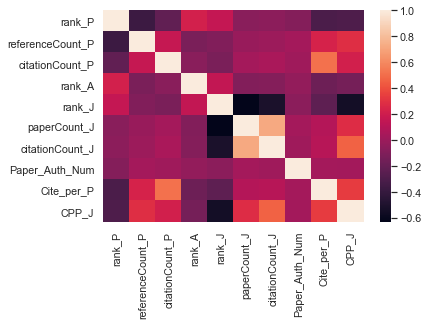

In [23]:
j_corr = journal1[journal1.columns[[2,3,4,5,7,8,9,10,11,12,13]]]

print("\nJOURNAL RANK")
print(j_corr.corr()["rank_J"])
print("\nPAPER RANK")
print(j_corr.corr()["rank_P"])
print("\nAUTHOR RANK")
print(j_corr.corr()["rank_A"])
sns.heatmap(j_corr.corr());

Findings:
1. A higher paper count and citation count leads to a lower journal rank (SUPER SLEECTIVE?)
2. Small positive correlation to Paper Rank
3. Small positive correlation to Author Rank
4. Author and Paper rank suggest similar trends

# Find CONFERENCE Stats

In [18]:
conf0 = data[data.columns[[0,3,4,5,6,8,9,11,17,18,19,20,21,22,23,28,29]]]
conf = conf0.dropna()
conf["CPP_CI"] = conf.citationCount_CI / conf.paperCount_C
conf["CPP_CS"] = conf.citationCount_CS / conf.paperCount_C
print(conf.shape)

conf.head()

(4647, 19)


<ipython-input-18-cd282d1c00a2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conf["CPP_CI"] = conf.citationCount_CI / conf.paperCount_C
<ipython-input-18-cd282d1c00a2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conf["CPP_CS"] = conf.citationCount_CS / conf.paperCount_C


,entity_id,rank_P,referenceCount_P,appearsInConferenceInstance,citationCount_P,fos_list,dcterms_creator,rank_A,pageCount_C,citationCount_CI,entity_id_C,rank_C,paperCount_C,citationCount_CS,entity_id_CS,Paper_Auth_Num,Cite_per_P,CPP_CI,CPP_CS
6939,30175120,24724,0,648541740.0,0,Medicine,2.526987e+09,21075.0,24.0,8.0,648541740.0,12575.0,772.0,1518.0,1.174169e+09,8,0.000000,0.010363,1.966321
9987,45249900,20604,13,20519062.0,14,Medicine,2.915163e+09,19679.0,314.0,3970.0,20519062.0,9555.0,6037.0,107988.0,1.129325e+09,65,12.358974,0.657611,17.887693
9988,45249900,20604,13,20519062.0,14,Medicine,2.497210e+09,21075.0,314.0,3970.0,20519062.0,9555.0,6037.0,107988.0,1.129325e+09,65,17.821375,0.657611,17.887693
9989,45249900,20604,13,20519062.0,14,Medicine,2.045873e+09,17177.0,314.0,3970.0,20519062.0,9555.0,6037.0,107988.0,1.129325e+09,65,11.800000,0.657611,17.887693
9990,45249900,20604,13,20519062.0,14,Medicine,2.093423e+09,16738.0,314.0,3970.0,20519062.0,9555.0,6037.0,107988.0,1.129325e+09,65,9.255319,0.657611,17.887693


In [19]:
conf['rank_P'] = conf.groupby('entity_id')['rank_P'].ffill()
conf1 = conf.drop_duplicates('entity_id', keep='first')

print(conf1.shape)
conf1.head()

(389, 19)


<ipython-input-19-95831e441666>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conf['rank_P'] = conf.groupby('entity_id')['rank_P'].ffill()


,entity_id,rank_P,referenceCount_P,appearsInConferenceInstance,citationCount_P,fos_list,dcterms_creator,rank_A,pageCount_C,citationCount_CI,entity_id_C,rank_C,paperCount_C,citationCount_CS,entity_id_CS,Paper_Auth_Num,Cite_per_P,CPP_CI,CPP_CS
6939,30175120,24724,0,648541740.0,0,Medicine,2.526987e+09,21075.0,24.0,8.0,648541740.0,12575.0,772.0,1518.0,1.174169e+09,8,0.000000,0.010363,1.966321
9987,45249900,20604,13,20519062.0,14,Medicine,2.915163e+09,19679.0,314.0,3970.0,20519062.0,9555.0,6037.0,107988.0,1.129325e+09,65,12.358974,0.657611,17.887693
15883,75541930,20661,53,148282223.0,5,Medicine,2.537626e+09,21049.0,495.0,1727.0,148282223.0,9819.0,8402.0,51419.0,1.140216e+09,30,107.545723,0.205546,6.119852
20375,95388310,23353,24,607634715.0,1,Medicine,2.088004e+09,20247.0,88.0,239.0,607634715.0,12238.0,998.0,3223.0,1.203333e+09,20,2.000000,0.239479,3.229459
21474,99899120,23505,2,198750481.0,0,Medicine,2.987899e+09,20749.0,23.0,100.0,198750481.0,12789.0,426.0,2695.0,1.128447e+09,20,8.253968,0.234742,6.326291


In [20]:
conf1['fos_list'].value_counts()

Computer science         91
Mathematics              66
Art                      55
Business                 43
Geology                  30
Materials science        24
Sociology                21
Geography                11
Biology                  11
History                   8
Environmental science     8
Philosophy                7
Medicine                  7
Economics                 3
Chemistry                 3
Political science         1
Name: fos_list, dtype: int64

Interesting to see which fields of study have more or less conferences in comparison. 
1. Are the more "revolutionary" subjects the ones with more conferences?
2. Math and Comp Sci seem to be related fields of study with AI and ML
3. Do the softer sciences have more conferences?
4. Interesting to see the opposition between Materials Science and Chemistry (related fields right?)
5. Econ and Poly Sci....... nonexistant

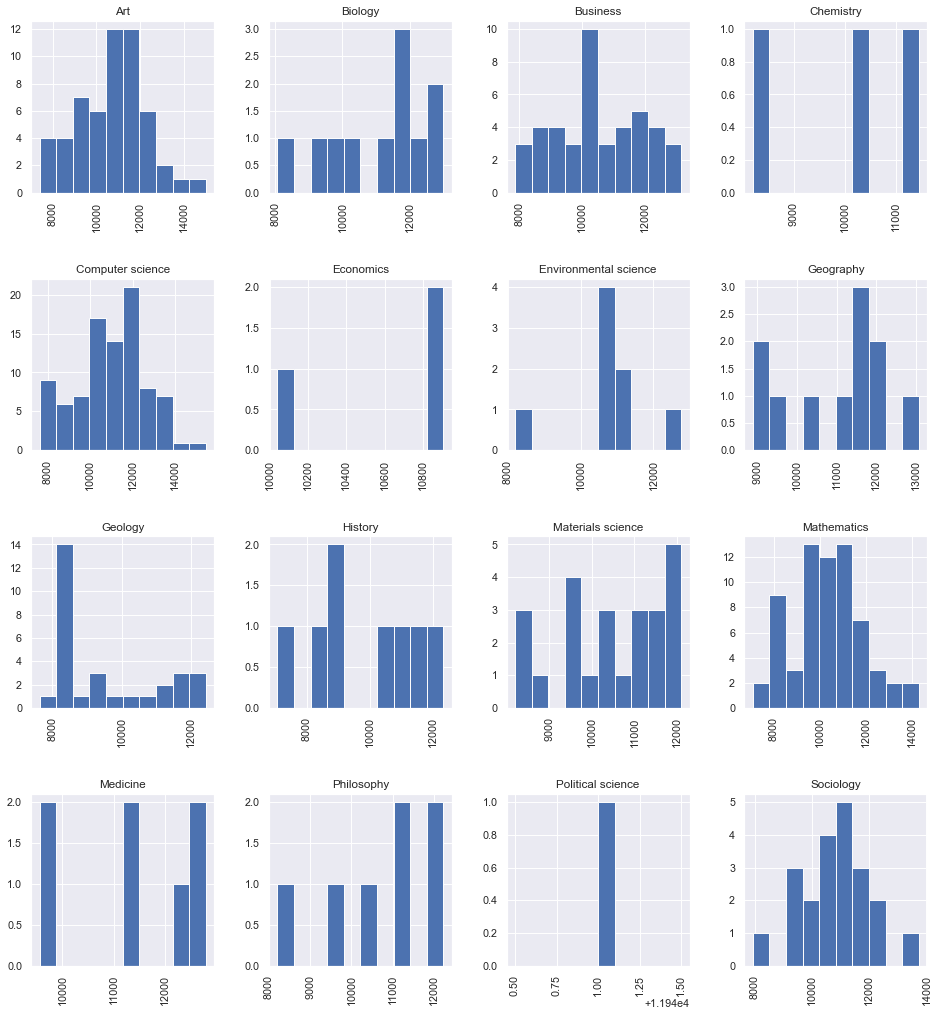

In [21]:
conf1['rank_C'].hist(by=conf1['fos_list'], figsize = (16,18));
#conf1.groupby("fos_list").boxplot(column="rank_P", figsize=(16,18));



CONFERENCE RANK
rank_P              0.161666
referenceCount_P    0.014593
citationCount_P    -0.148677
rank_A             -0.071603
pageCount_C        -0.541418
rank_C              1.000000
paperCount_C       -0.689127
citationCount_CS   -0.655513
Paper_Auth_Num      0.112080
Cite_per_P         -0.182318
CPP_CI             -0.102591
Name: rank_C, dtype: float64

PAPER RANK
rank_P              1.000000
referenceCount_P   -0.334638
citationCount_P    -0.593449
rank_A              0.201006
pageCount_C         0.085458
rank_C              0.161666
paperCount_C       -0.039060
citationCount_CS   -0.220723
Paper_Auth_Num     -0.113742
Cite_per_P         -0.197828
CPP_CI             -0.377558
Name: rank_P, dtype: float64

AUTHOR RANK
rank_P              0.201006
referenceCount_P   -0.174025
citationCount_P    -0.118357
rank_A              1.000000
pageCount_C         0.076038
rank_C             -0.071603
paperCount_C        0.046615
citationCount_CS   -0.038326
Paper_Auth_Num      0.061328
C

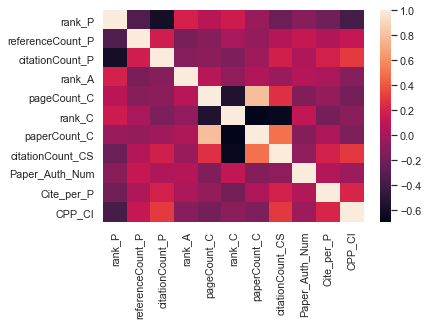

In [22]:
conf_corr = conf1[conf1.columns[[1,2,4,5,7,8,11,12,13,15,16,17]]]

print("\nCONFERENCE RANK")
print(conf_corr.corr()["rank_C"])
print("\nPAPER RANK")
print(conf_corr.corr()["rank_P"])
print("\nAUTHOR RANK")
print(conf_corr.corr()["rank_A"])
sns.heatmap(conf_corr.corr());

Findings:
1. Conference Rank is also negatively correlated with Citation Count
2. Paper Count is a negative correlation
3. Page Count is a negative correlation
4. Paper Rank suggests similar findings
5. FINALLY, Author Rank shows some slight positivity... or at least no negativity

The better conferences are more selective and have less papers... they also have papers that do not cite much.